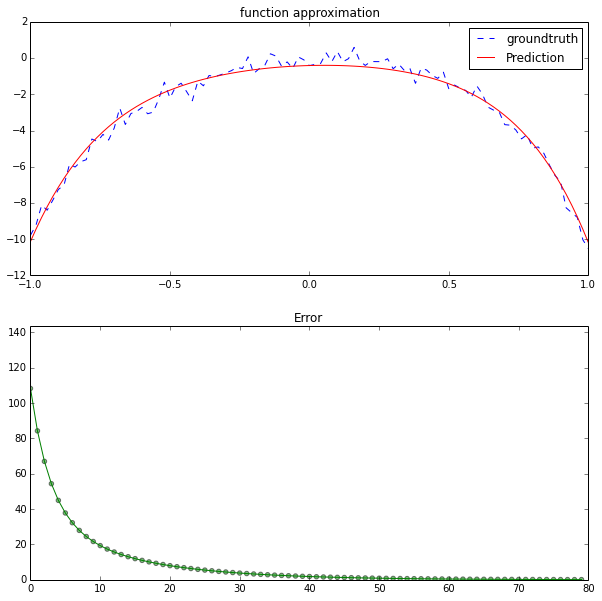

In [105]:
#!/usr/bin/python

#Author: Santiago Pascual

"""
This script exemplifies a linear regression system with theano, including
a real time plot showing the approximation result
"""

import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

%matplotlib inline

#optional values controling speed of learning and 
#graphics refresh rate
epochs = 800
graph_batch_size = 10
lr = 0.0001

#prepare data
trX = np.linspace(-1,1,101)
trY = 0.5*trX - 7*trX**2 + trX**3 + trX**4 + -2*trX**5 + -4*trX**6 +np.random.randn(trX.shape[0]) * 0.33

X = T.vector()
Y = T.scalar()

def model(X,W):
    return T.dot(X,W)

W = theano.shared(np.asarray([0.,0.,0.,0.,0.,0.,0.], dtype=theano.config.floatX))
y = model(X,W)

cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=W)
updates = [[W, W - gradient * lr]]

train = theano.function(inputs=[X,Y], outputs=cost, updates=updates, allow_input_downcast=True)
err = theano.function(inputs=[X,Y], outputs=cost, allow_input_downcast=True)

#Prepare the plot areas
X_eval = np.transpose([np.ones(trX.shape), trX, trX**2, trX**3,trX**4, trX**5 , trX**6])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)
ax.set_title('function approximation')
ax.plot(trX,trY,'b--', label='groundtruth')
line, = ax.plot(trX, model(X_eval,W).eval(), 'r', label='Prediction')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

cost_ax = fig.add_subplot(2,1,2)
cost_ax.set_title('Error')
#Compute big extreme error to set up a reasonable y axis
extreme_error = err([1, trX[0], trX[0]**2, trX[0]**3, 
                                               trX[0]**4,trX[0]**5,trX[0]**6],trY[0])
cost_ax.axis([0,epochs/graph_batch_size,0,extreme_error*1.5])

n = 0 #keep track of graphics batch number
tr_costs = [] #store cost
print "line: ", line
for i in xrange(epochs):
    for x,y in zip(trX,trY):
        tr_cost = train([1, x, x**2, x**3, x**4, x**5, x**6],y)
    if i%graph_batch_size == 0:
        tr_costs.append(tr_cost)
        line.set_ydata(model(X_eval,W).eval())
        cost_ax.scatter(n,tr_cost,c='green',alpha=0.5)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.pause(0.1)
        n += 1
        
#Show the result with the training cost line
display.clear_output(wait=False)
cost_ax.plot(tr_costs,'g')
